In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from zipfile import ZipFile
file = "new.zip"

with ZipFile(file,'r') as zip:
  zip.extractall()
  print('done')

done


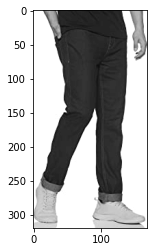

In [ ]:
DATADIR = r"/content/new_images"

CATEGORIES = ["jeans", "sarees", "trouser"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to jeans, saree and trouser
    for img in os.listdir(path):  # iterate over each image per jeans, saree, trouser
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray') #graph it
        plt.show()  # display!

        break
    break

In [ ]:
import pathlib
data_dir = pathlib.Path(DATADIR)
data_dir

PosixPath('/content/new_images')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/new_images/trouser/imgg223.jpg'),
 PosixPath('/content/new_images/trouser/imgg124.jpg'),
 PosixPath('/content/new_images/trouser/imgg73.jpg'),
 PosixPath('/content/new_images/trouser/imgg160.jpg'),
 PosixPath('/content/new_images/trouser/imgg83.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

720


In [ ]:
jeans = list(data_dir.glob('jeans/*'))
jeans[:5]

[PosixPath('/content/new_images/jeans/imgs21.jpg'),
 PosixPath('/content/new_images/jeans/imgs185.jpg'),
 PosixPath('/content/new_images/jeans/imgs40.jpg'),
 PosixPath('/content/new_images/jeans/imgs203.jpg'),
 PosixPath('/content/new_images/jeans/imgs149.jpg')]

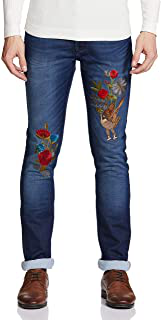

In [ ]:
PIL.Image.open(str(jeans[1]))

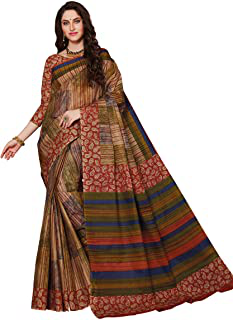

In [ ]:
sarees = list(data_dir.glob('sarees/*'))
PIL.Image.open(str(sarees[0]))

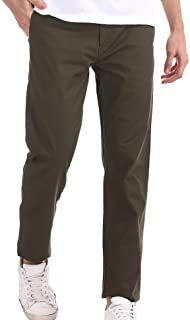

In [ ]:
trouser = list(data_dir.glob('trouser/*'))
PIL.Image.open(str(trouser[0]))

### Read dataset images from disk into numpy array using opencv

In [ ]:
clothes_images_dict = {
    'jeans': list(data_dir.glob('jeans/*')),
    'sarees': list(data_dir.glob('sarees/*')),
    'trouser': list(data_dir.glob('trouser/*')),
}

In [ ]:
clothes_labels_dict = {
    'jeans': 0,
    'sarees': 1,
    'trouser': 2,
}

In [ ]:
clothes_images_dict['jeans'][:5]

[PosixPath('/content/new_images/jeans/imgs21.jpg'),
 PosixPath('/content/new_images/jeans/imgs185.jpg'),
 PosixPath('/content/new_images/jeans/imgs40.jpg'),
 PosixPath('/content/new_images/jeans/imgs203.jpg'),
 PosixPath('/content/new_images/jeans/imgs149.jpg')]

In [ ]:
str(clothes_images_dict['jeans'][0])

'/content/new_images/jeans/imgs21.jpg'

In [ ]:
img = cv2.imread(str(clothes_images_dict['jeans'][0]))

In [ ]:
img.shape

(320, 233, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for clothe_name, images in clothes_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
          resized_img = cv2.resize(img,(180,180))
        except:
          break  
        X.append(resized_img)
        y.append(clothes_labels_dict[clothe_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [251, 255, 254],
         [253, 255, 252],
         [253, 255, 252]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [251, 255, 253],
         [253, 255, 252],
         [253, 255, 252]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [251, 255, 254],
         [253, 255, 252],
         [253, 255, 252]],

        ...,

        [[234, 235, 239],
         [215, 216, 220],
         [207, 208, 212],
         ...,
         [253, 254, 255],
         [253, 255, 255],
         [253, 255, 255]],

        [[238, 237, 241],
         [218, 217, 221],
         [209, 207, 212],
         ...,
         [253, 254, 255],
         [253, 255, 255],
         [253, 255, 255]],

        [[253, 252, 254],
         [230, 229, 233],
         [214, 213, 217],
         ...,
         [253, 254, 255],
        

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it

In [ ]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 13s 804ms/step - loss: 0.7548 - accuracy: 0.6754
Epoch 2/30
15/15 [==============================] - 12s 805ms/step - loss: 0.3453 - accuracy: 0.8421
Epoch 3/30
15/15 [==============================] - 12s 805ms/step - loss: 0.2514 - accuracy: 0.8947
Epoch 4/30
15/15 [==============================] - 12s 806ms/step - loss: 0.1749 - accuracy: 0.9386
Epoch 5/30
15/15 [==============================] - 12s 807ms/step - loss: 0.1211 - accuracy: 0.9605
Epoch 6/30
15/15 [==============================] - 12s 807ms/step - loss: 0.0771 - accuracy: 0.9693
Epoch 7/30
15/15 [==============================] - 12s 810ms/step - loss: 0.0394 - accuracy: 0.9934
Epoch 8/30
15/15 [==============================] - 12s 810ms/step - loss: 0.0520 - accuracy: 0.9825
Epoch 9/30
15/15 [==============================] - 12s 810ms/step - loss: 0.0358 - accuracy: 0.9934
Epoch 10/30
15/15 [==============================] - 12s 813ms/step - loss: 0.0217 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

5/5 [==============================] - 1s 225ms/step - loss: 1.0560 - accuracy: 0.8289


[1.0559900999069214, 0.8289473652839661]

### Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (88.67%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 4.38026094e+00,  1.85579145e+00,  1.26479254e+01],
       [ 1.34893990e+01,  2.66536325e-01,  6.48328638e+00],
       [ 1.33947334e+01, -5.31256533e+00,  1.34863939e+01],
       [-1.40454540e+01,  3.46165009e+01,  1.08453798e+01],
       [ 1.28095169e+01, -5.96115065e+00,  1.45539789e+01],
       [ 6.82284546e+00, -4.04623985e+00,  1.23035860e+01],
       [ 4.65617704e+00,  7.03729010e+00,  1.37090044e+01],
       [-9.47721481e+00,  3.81128159e+01,  5.21706581e-01],
       [-1.85457764e+01,  3.57819099e+01,  1.24159346e+01],
       [ 9.89007294e-01,  1.21807270e+01,  3.90729934e-01],
       [-3.14591146e+00,  2.38019733e+01,  6.30593920e+00],
       [ 2.51576638e+00, -1.51539361e+00,  1.91526928e+01],
       [-1.22226591e+01,  2.62578430e+01,  1.50193110e+01],
       [-1.26255970e+01,  2.96740913e+01,  1.84738789e+01],
       [ 5.86449623e+00, -5.69587469e+00,  1.15869665e+01],
       [ 1.13769188e+01, -2.99804401e+00,  1.17056723e+01],
       [ 1.91674366e+01, -7.02152205e+00

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

2

### Improve Test Accuracy Using Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### Original Image

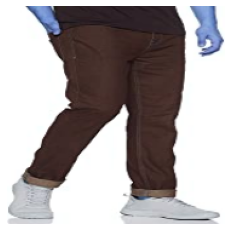

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[255.     , 253.0286 , 255.     ],
        [255.     , 253.53703, 254.96681],
        [255.     , 254.58075, 254.34508],
        ...,
        [254.96971, 254.96971, 254.96971],
        [253.07228, 253.07228, 253.07228],
        [228.42361, 228.42361, 228.42361]],

       [[255.     , 253.06526, 255.     ],
        [255.     , 253.63403, 254.92189],
        [255.     , 254.62457, 254.19484],
        ...,
        [254.81058, 254.81058, 254.81058],
        [253.77293, 253.77293, 253.77293],
        [240.19771, 240.19771, 240.19771]],

       [[255.     , 253.10196, 255.     ],
        [255.     , 253.73108, 254.87692],
        [255.     , 254.66838, 254.0446 ],
        ...,
        [254.85727, 254.85727, 254.85727],
        [254.83018, 254.83018, 254.83018],
        [254.98354, 254.98354, 254.98354]],

       ...,

       [[197.62427, 197.67595, 203.63887],
        [190.61531, 190.79588, 196.69734],
        [185.4962 , 185.783

### Newly generated training sample using data augmentation

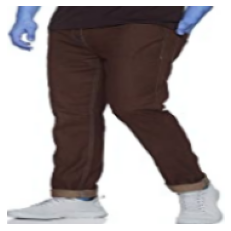

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [ ]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 16s 980ms/step - loss: 1.0181 - accuracy: 0.6118
Epoch 2/30
15/15 [==============================] - 15s 973ms/step - loss: 0.5300 - accuracy: 0.7675
Epoch 3/30
15/15 [==============================] - 15s 976ms/step - loss: 0.3347 - accuracy: 0.8509
Epoch 4/30
15/15 [==============================] - 15s 979ms/step - loss: 0.2953 - accuracy: 0.8838
Epoch 5/30
15/15 [==============================] - 15s 975ms/step - loss: 0.3076 - accuracy: 0.8640
Epoch 6/30
15/15 [==============================] - 15s 975ms/step - loss: 0.2935 - accuracy: 0.8816
Epoch 7/30
15/15 [==============================] - 15s 975ms/step - loss: 0.2679 - accuracy: 0.9035
Epoch 8/30
15/15 [==============================] - 15s 978ms/step - loss: 0.2566 - accuracy: 0.8969
Epoch 9/30
15/15 [==============================] - 15s 977ms/step - loss: 0.2808 - accuracy: 0.8838
Epoch 10/30
15/15 [==============================] - 15s 973ms/step - loss: 0.2847 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

5/5 [==============================] - 1s 237ms/step - loss: 0.3706 - accuracy: 0.8553


[0.3706400990486145, 0.8552631735801697]

In [ ]:
pre=model.predict(X_test_scaled)
pre

array([[-4.6970311e-01, -7.8549820e-01,  1.4707772e+00],
       [ 3.9617176e+00, -5.6193852e+00,  3.9580457e+00],
       [ 4.4021511e+00, -6.0685058e+00,  3.3412333e+00],
       [-7.1681509e+00,  6.2329831e+00,  4.0990862e-01],
       [ 4.9152813e+00, -6.8729033e+00,  3.9934285e+00],
       [ 3.5315540e+00, -4.9641070e+00,  2.5467246e+00],
       [-6.5836844e+00,  7.7526784e+00, -5.7805734e+00],
       [-7.6150799e+00,  9.3842745e+00, -5.5414166e+00],
       [-9.7131720e+00,  9.3740892e+00, -1.7456225e+00],
       [-2.7005501e+00,  2.1155336e+00, -6.2797421e-01],
       [-5.0413651e+00,  5.9971299e+00, -4.3958278e+00],
       [ 6.7505933e-02, -2.8217854e+00,  5.8807492e+00],
       [-9.2080278e+00,  7.5905781e+00,  1.2025584e+00],
       [-9.3511581e+00,  6.6965556e+00,  2.6491723e+00],
       [ 1.6081785e+00, -3.1151526e+00,  2.0182059e+00],
       [ 3.6457610e+00, -6.1506763e+00,  4.3752346e+00],
       [ 2.6033797e+00, -4.9956603e+00,  6.4441504e+00],
       [-1.6380265e-01, -1.7598

In [ ]:
y_pred_classes = [np.argmax(element) for element in pre]
y_pred_classes

[2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('classification_report\n',classification_report(y_test,y_pred_classes))

classification_report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        31
           1       0.97      0.98      0.98        60
           2       0.84      0.80      0.82        61

    accuracy                           0.86       152
   macro avg       0.83      0.83      0.83       152
weighted avg       0.86      0.86      0.86       152



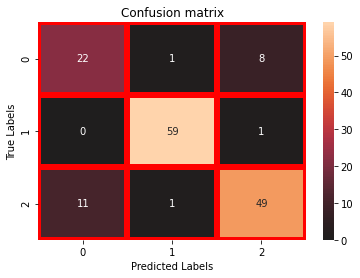

In [ ]:
#plot confusion matrix heatmap
import seaborn as sns
conf_mat = confusion_matrix(y_test,y_pred_classes)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidth=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')

plt.show()